In [1]:
#Título: Reconhecimento de imagens do filme King Kong
#Autor: Fernando Schmitt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
#Definindo parâmetros 
data= '/home/fernando/Downloads/kingkong'
batch_size= 32
img_height= 100
img_width= 100

In [4]:
train= tf.keras.utils.image_dataset_from_directory(data,
                                                   validation_split= 0.2,
                                                   subset= 'training',
                                                   seed= 123,
                                                   image_size= (img_height, img_width),
                                                   batch_size= batch_size)

Found 480 files belonging to 3 classes.
Using 384 files for training.


In [5]:
validation= tf.keras.utils.image_dataset_from_directory(data,
                                                   validation_split= 0.2,
                                                   subset= 'validation',
                                                   seed= 123,
                                                   image_size= (img_height, img_width),
                                                   batch_size= batch_size)

Found 480 files belonging to 3 classes.
Using 96 files for validation.


In [6]:
#visualizando as classes
classes= train.class_names
classes

['King Kong (1933)', 'King Kong (1976)', 'King Kong (2005)']

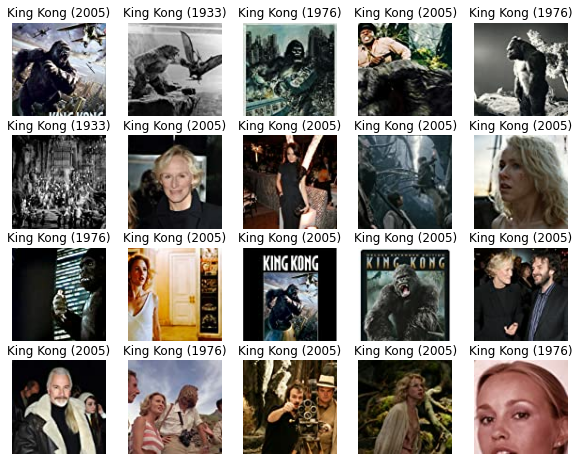

In [7]:
#visualizando os dados
plt.figure(figsize=(10, 10))
for imgs, labels in train.take(1):
    for i in range(20):
        ax= plt.subplot(5,5, i + 1)
        plt.imshow(imgs[i].numpy().astype('uint8'))
        plt.title(classes[labels[i]])
        plt.axis('off')

In [8]:
#Criando a rede para reconhecimento
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
#melhorando o desempenho da rede neural usando cache e prefetch
tune= tf.data.AUTOTUNE
train= train.cache().shuffle(480).prefetch(buffer_size= tune)
validation= validation.cache().prefetch(buffer_size= tune)


In [10]:
#normalizando os dados para a rede neural no intervalo [0,1]
normal= layers.Rescaling(1./255)

In [11]:
normal_data= train.map(lambda x, y: (normal(x), y))
images_batch, labels_batch= next(iter(normal_data))
first_image= images_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
#Criando o modelo
num_classes= len(classes)

model= Sequential([
    layers.Rescaling(1./255, input_shape= (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

In [13]:
#Compilando o modelo
model.compile(optimizer= 'adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics=['accuracy'])

In [14]:
#Visualizando as camadas do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        1

In [15]:
#Treinando o modelo
epochs= 100
train_model= model.fit(train, validation_data= validation, epochs= epochs)

Epoch 1/100
12/12 [==============================] - 3s 189ms/step - loss: 1.1547 - accuracy: 0.3802 - val_loss: 1.0630 - val_accuracy: 0.5312
Epoch 2/100
12/12 [==============================] - 2s 168ms/step - loss: 1.0308 - accuracy: 0.5339 - val_loss: 0.9718 - val_accuracy: 0.6146
Epoch 3/100
12/12 [==============================] - 2s 168ms/step - loss: 0.9486 - accuracy: 0.5885 - val_loss: 0.8763 - val_accuracy: 0.6250
Epoch 4/100
12/12 [==============================] - 2s 167ms/step - loss: 0.9161 - accuracy: 0.6042 - val_loss: 0.8983 - val_accuracy: 0.6146
Epoch 5/100
12/12 [==============================] - 2s 167ms/step - loss: 0.8226 - accuracy: 0.6589 - val_loss: 0.8986 - val_accuracy: 0.5729
Epoch 6/100
12/12 [==============================] - 2s 170ms/step - loss: 0.7610 - accuracy: 0.6641 - val_loss: 0.7657 - val_accuracy: 0.6771
Epoch 7/100
12/12 [==============================] - 2s 172ms/step - loss: 0.6501 - accuracy: 0.7318 - val_loss: 0.9177 - val_accuracy: 0.6146

12/12 [==============================] - 2s 169ms/step - loss: 1.7826e-04 - accuracy: 1.0000 - val_loss: 3.6857 - val_accuracy: 0.5312
Epoch 58/100
12/12 [==============================] - 2s 169ms/step - loss: 1.6673e-04 - accuracy: 1.0000 - val_loss: 3.7148 - val_accuracy: 0.5312
Epoch 59/100
12/12 [==============================] - 2s 166ms/step - loss: 1.5857e-04 - accuracy: 1.0000 - val_loss: 3.7347 - val_accuracy: 0.5312
Epoch 60/100
12/12 [==============================] - 2s 166ms/step - loss: 1.5286e-04 - accuracy: 1.0000 - val_loss: 3.7393 - val_accuracy: 0.5312
Epoch 61/100
12/12 [==============================] - 2s 166ms/step - loss: 1.4673e-04 - accuracy: 1.0000 - val_loss: 3.7667 - val_accuracy: 0.5312
Epoch 62/100
12/12 [==============================] - 2s 170ms/step - loss: 1.3986e-04 - accuracy: 1.0000 - val_loss: 3.7749 - val_accuracy: 0.5312
Epoch 63/100
12/12 [==============================] - 2s 170ms/step - loss: 1.3450e-04 - accuracy: 1.0000 - val_loss: 3.7681 

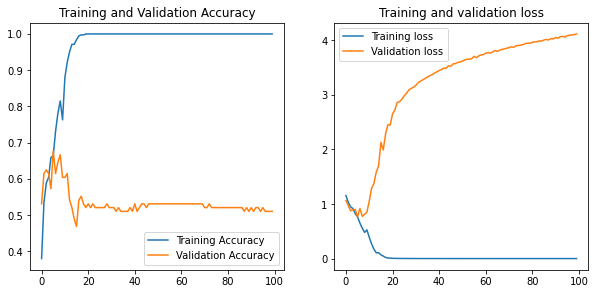

In [16]:
#Visualizando o resultado do treinamento
ac= train_model.history['accuracy']
v_ac= train_model.history['val_accuracy']
vl= train_model.history['loss']
v_l= train_model.history['val_loss']

e_range= range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(e_range, ac, label= 'Training Accuracy')
plt.plot(e_range, v_ac, label= 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(e_range, vl, label= 'Training loss')
plt.plot(e_range, v_l, label= 'Validation loss')
plt.legend(loc= 'upper left')
plt.title('Training and validation loss')
plt.show()

In [17]:
#Aumentando a quantidade de dados , manipulando os já existentes 
#para melhorar a precisão do modelo

more_data= keras.Sequential([layers.RandomFlip('horizontal', 
                                               input_shape= (img_height,
                                                            img_width, 3)),
                            layers.RandomRotation(0.1),
                            layers.RandomZoom(0.1)])

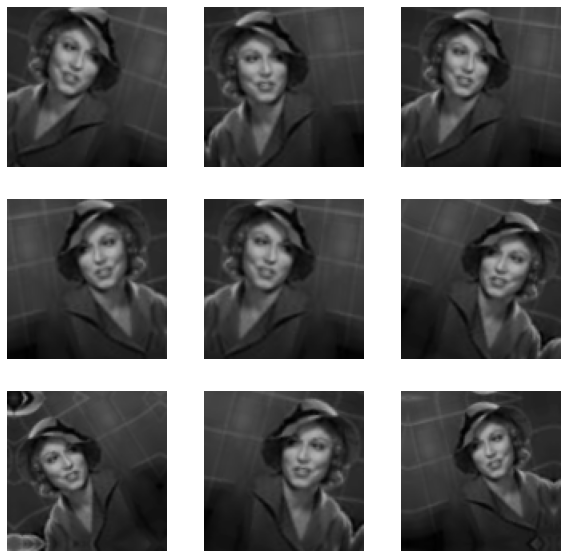

In [18]:
#Visualizando as imagens modificadas
plt.figure(figsize=(10, 10))
for imgs, _ in train.take(1):
    for i in range(9):
        ag_imgs= more_data(imgs)
        ax= plt.subplot(3,3, i + 1)
        plt.imshow(ag_imgs[0].numpy().astype('uint8'))
        plt.axis('off')

In [19]:
#Novo modelo

model= Sequential([
    more_data,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes)
])

In [20]:
#Compilando o modelo

model.compile(optimizer= 'adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                  

In [22]:
epochs= 100
n_model= model.fit(train, validation_data= validation, epochs= epochs)

Epoch 1/100
12/12 [==============================] - 3s 205ms/step - loss: 1.1231 - accuracy: 0.4740 - val_loss: 1.0489 - val_accuracy: 0.5729
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 1.0396 - accuracy: 0.5391 - val_loss: 0.9568 - val_accuracy: 0.6146
Epoch 3/100
12/12 [==============================] - 2s 188ms/step - loss: 0.9727 - accuracy: 0.5443 - val_loss: 0.8923 - val_accuracy: 0.6354
Epoch 4/100
12/12 [==============================] - 2s 186ms/step - loss: 0.9105 - accuracy: 0.5938 - val_loss: 0.8804 - val_accuracy: 0.6250
Epoch 5/100
12/12 [==============================] - 2s 185ms/step - loss: 0.8870 - accuracy: 0.5938 - val_loss: 0.8437 - val_accuracy: 0.6250
Epoch 6/100
12/12 [==============================] - 2s 189ms/step - loss: 0.8485 - accuracy: 0.6146 - val_loss: 0.7906 - val_accuracy: 0.6458
Epoch 7/100
12/12 [==============================] - 2s 189ms/step - loss: 0.8060 - accuracy: 0.6589 - val_loss: 0.9158 - val_accuracy: 0.5938

Epoch 58/100
12/12 [==============================] - 2s 187ms/step - loss: 0.1242 - accuracy: 0.9479 - val_loss: 0.9551 - val_accuracy: 0.7292
Epoch 59/100
12/12 [==============================] - 2s 191ms/step - loss: 0.1147 - accuracy: 0.9583 - val_loss: 1.0538 - val_accuracy: 0.7292
Epoch 60/100
12/12 [==============================] - 2s 185ms/step - loss: 0.1287 - accuracy: 0.9453 - val_loss: 0.9131 - val_accuracy: 0.7604
Epoch 61/100
12/12 [==============================] - 2s 185ms/step - loss: 0.1109 - accuracy: 0.9609 - val_loss: 1.0040 - val_accuracy: 0.7500
Epoch 62/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0904 - accuracy: 0.9635 - val_loss: 1.6406 - val_accuracy: 0.6667
Epoch 63/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0870 - accuracy: 0.9661 - val_loss: 1.2714 - val_accuracy: 0.6667
Epoch 64/100
12/12 [==============================] - 2s 186ms/step - loss: 0.1022 - accuracy: 0.9583 - val_loss: 1.0595 - val_accuracy:

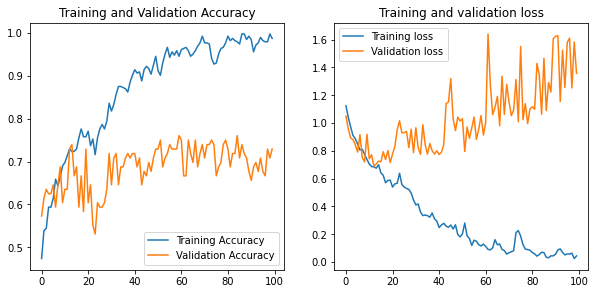

In [23]:
#Visualizando o resultado do novo treinamento
ac= n_model.history['accuracy']
v_ac= n_model.history['val_accuracy']
vl= n_model.history['loss']
v_l= n_model.history['val_loss']

e_range= range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(e_range, ac, label= 'Training Accuracy')
plt.plot(e_range, v_ac, label= 'Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(e_range, vl, label= 'Training loss')
plt.plot(e_range, v_l, label= 'Validation loss')
plt.legend(loc= 'upper left')
plt.title('Training and validation loss')
plt.show()